---

<br>
    
# Python for Neuroscientist

<br>

* **created by THK. 20-08-03.** <br><br>

* **이 노트는 Neuroscientist를 위한 Python 공부를 위해 구성되었다.** <br><br>
* **참고 자료는 아래와 같다.**
    1. 신경과학자를 위한 Python (https://xcorr.net/2020/02/21/transitioning-away-from-matlab/)
    2. 점프 투 파이썬 (https://wikidocs.net/book/1)
    3. Psychopy 홈페이지 (https://www.psychopy.org/)
    4. Psychopy Coder View 학습 자료 1 (https://www.djmannion.net/psych_programming/vision/index.html)
    5. PSychopy Coder view 학습 자료 2 (https://www.socsci.ru.nl/wilberth/psychopy/index.html)

<br>

* 주피터 노트북의 단축기

    - 1. Command Mode ( press Esc to enable) 
        - 1. shift-Enter : run cell, select below
        - 2. Ctrl-Enter : run cell
        - 3. Alt-Enter : run cell, insert below 
        - 4. Y : to code 
        - 5. M : to markdown
        - 6. B : insert cell below
        - 7. X : cut selected cell
        - 8. C : copy selected cell
        - 9. Shift-V : paste cell above
        - 10. V : paste cell below
        - 11. Z : undo last cell deletion
        - 12. D,D : delete selected cell
        - 13. Shift-M : merge cell below

    - 2. Edit Mode ( press Enter to enable)
        - 1. Shift-Tab : 툴팁표시
        - 2. Ctrl-] : indent
        - 3. Ctrl-Shift- : split cell

<br>

* 주피터 노트북 마크다운 관련 참고 자료
    - 1. https://datanetworkanalysis.github.io/2019/10/12/markdown
    - 2. https://steemit.com/kr/@nand/markdown

<br>

---

<br>

## 유용한 패키지 모음

<br>

* Experiment Programming

    * **Psychopy** for visual stimulus presentation & running experiments
    
<br>

* Math & Data Analysis

    * **math** for mathmatical function
    * **random** for generating random number
    * **numpy** for matrices
    * **pandas** for dataframes
    * **PyMC3** for Bayesian inference
    * **scipy** for signal processing, statistical analysis

<br>

* Plotting

    * **matplotlib** for plotting
    * **seaborn**, which includes a number of useful plot types, including violin plots and histograms.
    * **plotnine**, which implements the grammar of graphics (ggplot2 in R).


<br>

* Machine Learning

    * **PyMVPA** is a Python package intended to ease statistical learning analyses of large datasets.
    * **sklearn** for machine learning
    * **pytorch** or **tensorflow** for fitting ANNs
    * **brian** for spiking neural net simulations

<br>

* fMRI Processing & MVPA

    * **Nipy**, **nitime** for analysis of structural and functional neuroimaging data.
    * **nilearn** for machine learning with MRI

<br>

* ETC ...

    * **os**, **os.path** for control OS
    * **neo** for managing electrophysiology data in Python
    * **MNE** for EEG analysis

<br>

---

<br>

## Tutorial

<br>

<br>

### General Setting

<br>

In [2]:
# General Setting

# %reset
# import os
# os.getcwd()
# os.chdir(r'D:/Study/th_project_v4')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9
from scipy import stats
import pylab as pl

# Display HTML
from IPython.core.display import display, HTML

# 노트북 안에 그래프를 그리기
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용
plt.style.use('ggplot')

# 그래프에서 한글 폰트 및 마이너스 폰트 깨지는 문제를 대처
plt.rc('font', family='NanumGothic') # For Windows
mpl.rcParams['axes.unicode_minus'] = False

# 그래프 글자 크기 조정
plt.rc('font', family='NanumGothic') # For Windows
plt.rc('font', size = 20)

<br>

### Psychopy 연습

<br>


In [9]:
# font Check
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths='C:\\WINDOWS\\Fonts\\', fontext='otf')
# fFile = ['C:\\WINDOWS\\Fonts\\NotoSansCJKkr-Medium.otf']
# fName ='Noto Sans CJK KR Medium' # 이 폰트에서 bold, italic은 먹히지 않는 듯 하다..
# fontFiles = fFile, font = fName,

<br>

#### 자극 그리기, Drawing

<br>

* 화면을 그리고 text 자극을 보여주기
* Grating 그리기
* Shape 그리기
* Image 그리기
* Dots 그리기

<br>

#####  화면을 그리고 text 자극을 보여주기

<br>

In [8]:
import psychopy
import psychopy.visual # 시각 요소를 조절하기 위한 모듈
import psychopy.event # event를 조정하기 위한 모듈

fFile = ['C:\\WINDOWS\\Fonts\\NotoSansCJKkr-Medium.otf']
fName ='Noto Sans CJK KR Medium' # 이 폰트에서 bold, italic은 먹히지 않는 듯 하다..

win = psychopy.visual.Window( # psychopy.visual package를 통해 window를 열어준다. 
    size=[800, 600], # window의 크기를 가로와 세로 [x, y]의 pixels 크기로 설정해준다
                       # 내 노트북에서는 1920 * 1080
    fullscr=False, # window를 full screen mode로 열기위한 코드, full-screen이 timing이 더 정확하다.
    screen=0,     # 모니터가 여러 개일때 어떤 모니터에서 window를 열지 설정해준다. default monitor는 0
    winType='pyglet',  # window의 type을 설정해준다고 하는데, 잘 모르면 pyglet으로 그대로 가자.
    allowGUI=True,     # window에 파일 닫기 버튼과 같은 gui를 보여줄지 설정한다. fullscr이 아닐때 유용하다.
    allowStencil=False, # True로 설정되어있으면 OpenGL stencil buffer를 사용한다고 한다. 장점은 모르겠다.
    monitor='monitor_v1',  # 실험에 사용할 monitor profile의 이름을 넣는다. 이 모니터는 builder view의 preference에서 설정할 수 있다.
    color=[1,1,1],      # [r,g,b]로 모니터의 색을 설정한다. 값은 -1.0 ~ +1.0 으로 넣는다. white는 [1,1,1], black은 [-1,-1,-1] 이다.
                        # 기존의 255, 255, 255 rgb를 -1.0 ~ + 1.0으로 펼쳐놓았다고 생각하면 된다  
    colorSpace='rgb',   # 색상표를 뭐로 설정할지 넣는다. RGB를 그대로 따라가면 된다. 
    blendMode='avg',    # 뭔지 모르겠다. 이대로 쓰자.
    useFBO=True,        # 뭔지 모르겠다. 이대로 쓰자.
    units='pix')        # window에 제시될 contents들의 크기를 어떤 단위로 할지 설정해준다. 
                        # *None*, 'height' (of the window), 'norm' (normalised), 'deg', 'cm', 'pix' 등이 있다.

startM1 = psychopy.visual.TextStim( # help(visual.TextStim) 로는 자세한 옵션을 보기 어렵다. 아래의 URL을 들어가 참고한다.
                          # https://www.psychopy.org/api/visual/textstim.html#psychopy.visual.TextStim
    win=win, # 어느 window에 띄울지 설정한다. 
    name='startM1', # start Message component의 이름을 설정한다. 변수 이름과 동일하게 하는 것이 좋을 것 같다.
    text='테스트 입니다.\n\n잘 보이나요?', # 메시지 내용을 설정한다. \n은 줄바꿈을 나타낸다.
    fontFiles=fFile,
    font=fName, # font를 설정한다. 
    units='norm', # text 자극의 크기, 위치 등을 표현할 단위를 설정한다. 
                  # 'height' (of the window), 'norm' (normalised), 'deg', 'cm', 'pix' 등이 있다.
                  # norm에서 -1, -1은 좌측 하단, +1, +1은 우측 상단을 의미한다. 헷갈리지 말자. 
    pos=(0, 0),   # 자극의 위치를 설정한다. (x, y)를 단위에 따라 설정해준다. norm 단위에서 0, 0은 정 중앙이다.  
    height=0.1,  # 글자 크기를 설정해준다. units의 단위를 따른다. height를 설정해주면 width는 font에 따라 자동으로 설정된다.
    wrapWidth=None, # warpWidth는 일종의 text 상자를 만들어주고, 그 안에서 글의 width를 설정해주는 개념이다. 
                    # None 또는 int, float의 값을 입력해준다. 
    ori=0, # text 자극의 orientation을 설정해준다. degree의 단위로 360 내에서 설정할 수 있다. ori가 0이면 딱 12시 방향으로 똑바로 선 것을 나타낸다.
    color='black', # text 자극의 색을 설정해준다. [-1.0, -1.0, -1.0], 'black' 등으로 설정할 수 있다.
    colorSpace='rgb', # color space는 기본 rgb (-1.0 ~ +1.0)으로 설정되어 있다. 255 rgb로 바꾸고 싶으면 rgb255를 입력하면 된다.
    italic=False, # Italic 체를 설정한다.
    bold=True, # Bold 체를 설정한다.
    antialias=True, # antialiasing을 설정한다. 글자가 더 부드럽게 보일수 있지만, 느려진다. instruction에는 유용하다. 
    opacity=1, # 투명도를 나타낸다. 1은 완전 불투명, 0은 완전 투명이다. 
    languageStyle='LTR', # left to rigth로 글자가 입력된다. 
    depth=0.0) # DEPRECATED. Depth is now controlled simply by drawing order.

startM2 = psychopy.visual.TextStim(
    win=win, name='startM2', 
    text='다음 텍스트입니다.\n\n이 것도 잘 보이나요?', 
    fontFiles=fFile, font=fName, 
    units='norm', pos=(0, 0), height=0.1, wrapWidth=None, ori=0, 
    color=[1,0,0], colorSpace='rgb', italic=False, bold=False, 
    antialias=True, opacity=1, languageStyle='LTR', depth=0.0)

startM1.draw() 
win.flip() 
psychopy.event.waitKeys()

startM2.draw() 
win.flip() 
psychopy.event.waitKeys()

startM2.text='텍스트를 바꿔봅니다.\n\n잘 보이겠죠?'
startM2.color = [0, 0, 1]
startM2.bold = True
startM2.pos = [0, -0.5]

startM2.draw() 
win.flip() 
psychopy.event.waitKeys()

win.close()

<br>

#####  Grating 그리기

In [10]:
import psychopy
import psychopy.visual
import psychopy.event

win = psychopy.visual.Window(
    size=[800, 600], fullscr=False, screen=0,
    allowGUI=True, allowStencil=False,
    winType='pyglet', monitor='monitor_v1', 
    color=[1,1,1], colorSpace='rgb', 
    blendMode='avg', useFBO=True, units='pix')

# Grating 그려보기
grating = psychopy.visual.GratingStim(
    win=win,
    units="pix",
    size=[80, 80]
)

grating.draw()
win.flip()
psychopy.event.waitKeys()

# grating의 위치와 phase를 바꿔가며 그리기
grating_vpos = [150, 50, -50, -150]
grating_phase = [0.0, 0.16, 0.33, 0.5]

for i_phase in range(4):
    grating.phase = grating_phase[i_phase]
    grating.pos = [0, grating_vpos[i_phase]]
    grating.draw()

win.flip()
psychopy.event.waitKeys()

# grating의 spatial frequency 바꿔가며 그리기
grating = psychopy.visual.GratingStim(
    win=win,
    units="pix",
    size=[150, 150]
)

grating.sf = 5.0 / 150.0

grating.draw()
win.flip()
psychopy.event.waitKeys()

# grating의 orientation 바꿔가며 그리기
grating = psychopy.visual.GratingStim(
    win=win,
    units="pix",
    size=[80, 80]
)

grating.sf = 5.0 / 80.0
orientations = [0.0, 45.0, 90.0, 135.0]
grating_hpos = [-300, -100, 100, 300]

for i_grating in range(4):
    grating.ori = orientations[i_grating]
    grating.pos = [grating_hpos[i_grating], 0]
    grating.draw()

win.flip()
psychopy.event.waitKeys()

# grating에 mask 추가하기 
grating = psychopy.visual.GratingStim(
    win=win,
    units="pix",
    size=[80, 80]
)

grating.sf = 5.0 / 80.0
grating.mask = "gauss"
# grating.mask = "circle"
orientations = [0.0, 45.0, 90.0, 135.0]
grating_hpos = [-300, -100, 100, 300]

for i_grating in range(4):
    grating.ori = orientations[i_grating]
    grating.pos = [grating_hpos[i_grating], 0]
    grating.draw()

win.flip()
psychopy.event.waitKeys()

# grating의 contrast 조정하기
grating = psychopy.visual.GratingStim(
    win=win,
    units="pix",
    size=[80, 80]
)

grating.sf = 5.0 / 80.0
grating.mask = "circle"
contrasts = [0.1, 0.2, 0.4, 0.8]
grating_hpos = [-300, -100, 100, 300]

for i_grating in range(4):
    grating.contrast = contrasts[i_grating]
    grating.pos = [grating_hpos[i_grating], 0]
    grating.draw()
win.flip()
psychopy.event.waitKeys()

# grating의 투명도 조정하기
grating = psychopy.visual.GratingStim(
    win=win,
    units="pix",
    size=[80, 80]
)

grating.sf = 5.0 / 80.0
grating.mask = "circle"
opacitys = [0.1, 0.2, 0.4, 0.8]
grating_hpos = [-300, -100, 100, 300]

for i_grating in range(4):
    grating.opacity = opacitys[i_grating]
    grating.pos = [grating_hpos[i_grating], 0]
    grating.draw()
win.flip()
psychopy.event.waitKeys()

win.close()

<br>

#####  Shape 그리기

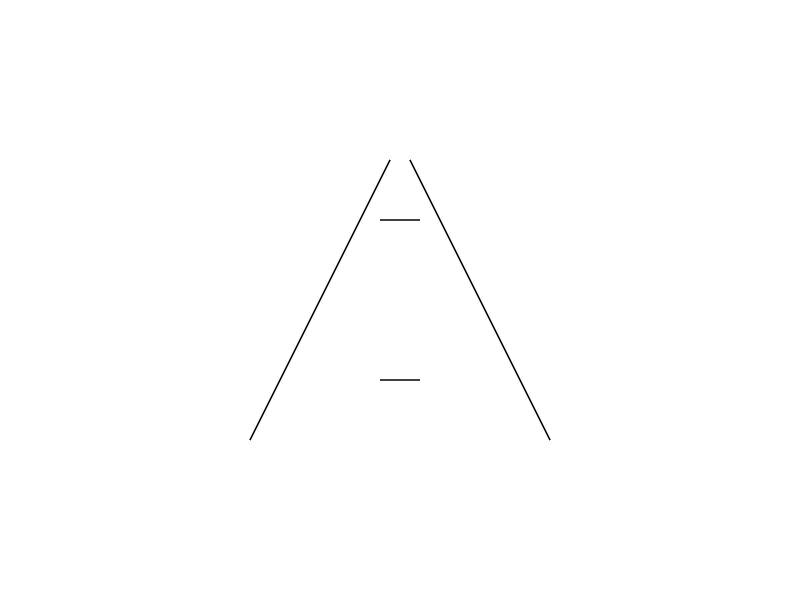

In [4]:
import psychopy
import psychopy.visual
import psychopy.event

win = psychopy.visual.Window(
    size=[800, 600], fullscr=False, screen=0,
    allowGUI=True, allowStencil=False,
    winType='pyglet', monitor='monitor_v1', 
    color=[1,1,1], colorSpace='rgb', 
    blendMode='avg', useFBO=True, units='pix')

# Line 그려보기
line = psychopy.visual.Line(
    win=win,
    units="pix",
    lineColor=[-1, -1, -1]
)

line.start = [-200, -200]
line.end = [+200, +200]

line.draw()
win.flip()
psychopy.event.waitKeys()

# line의 색과 굵기 바꿔보기
line.lineColor = [-1, -1, 1]
line.lineWidth = 5

line.draw()
win.flip()
psychopy.event.waitKeys()

# 여러 개의 Line 그리기
line = psychopy.visual.Line(
    win=win,
    units="pix",
    lineColor=[-1, -1, -1]
)

bar_horiz_offset = 20
bar_vert_offset = 80

for bar_offset in [-1, +1]:
    line.start = [-bar_horiz_offset, bar_vert_offset * bar_offset]
    line.end = [+bar_horiz_offset, bar_vert_offset * bar_offset]
    line.draw()

pers_far_horiz_offset = 150
pers_near_horiz_offset = 10
pers_vert_offset = 140

for pers_offset in [-1, +1]:
    line.start = [pers_far_horiz_offset * pers_offset, -pers_vert_offset]
    line.end = [pers_near_horiz_offset * pers_offset, +pers_vert_offset]
    line.draw()

win.flip()
win.getMovieFrame()
A = win.getMovieFrame() # help(psychopy.visual.Window.getMovieFrame)
                        # Capture the current Window as an image.
psychopy.event.waitKeys()

win.flip()
psychopy.event.waitKeys()
win.close()

A

556.5172 	ERROR 	If you setColor with a numeric color value then you need to specify a color space, e.g. setColor([1,1,-1],'rgb'), unless you used a numeric value previously in which case PsychoPy will reuse that color space.)


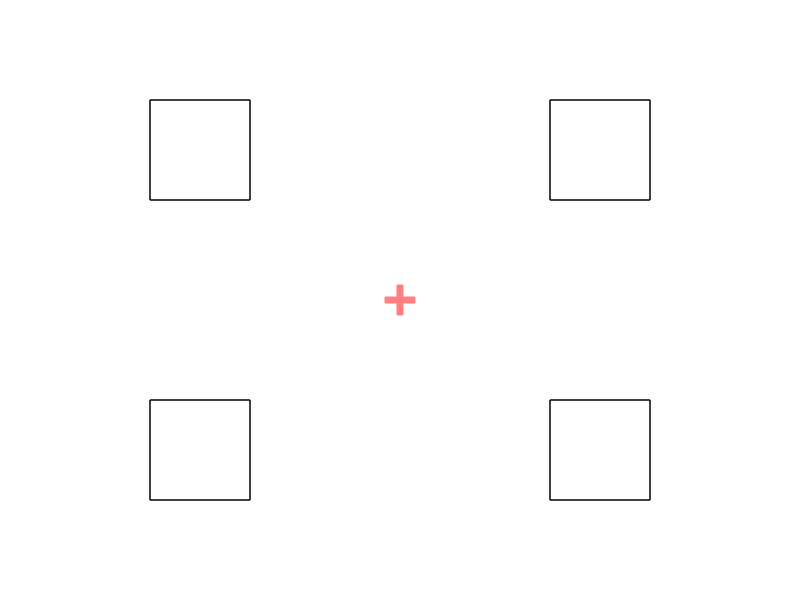

In [11]:
import psychopy
import psychopy.visual
import psychopy.event

win = psychopy.visual.Window(
    size=[800, 600], fullscr=False, screen=0,
    allowGUI=True, allowStencil=False,
    winType='pyglet', monitor='monitor_v1', 
    color=[1,1,1], colorSpace='rgb', 
    blendMode='avg', useFBO=True, units='pix')

# Rectangle 그려보기
rect = psychopy.visual.Rect(
    win=win,
    units="pix",
    # width=200, height=100,
    size = [200, 200],
    fillColor=[1, -1, -1],
    lineColor=[-1, -1, 1]
)

rect.draw()
win.flip()
psychopy.event.waitKeys()

# 여러 개의 Rectangle 그려보기
import random
rect = psychopy.visual.Rect(win=win, units="pix")
n_rect = 500
for i_rect in range(n_rect):
    rect.width = random.uniform(10, 100)
    rect.height = random.uniform(10, 100)
    rect_color = [random.uniform(-1, 1), random.uniform(-1, 1), random.uniform(-1, 1)]
    rect.fillColor = rect_color
    rect.fillColorSpace='rgb'
    rect.lineColor = rect_color
    rect.lineColorSpace='rgb' 
    rect.pos = [
        random.uniform(-400, 400),
        random.uniform(-300, 300)
    ]
    rect.draw()

win.flip()
psychopy.event.waitKeys()

# 중앙 Fixation과 사분면에 Rectangel 그려보기

fix = psychopy.visual.ShapeStim(
    win=win, name='fix', vertices='cross', units='pix', 
    size=(30, 30),
    ori=0, pos=(0, 0),
    lineWidth=1, lineColor=[1,0,0], lineColorSpace='rgb',
    fillColor=[1,0,0], fillColorSpace='rgb',
    opacity=1, depth=0.0, interpolate=True
)

rect = psychopy.visual.Rect(
    win=win,
    units="pix",
    # width=200, height=100,
    size = [100, 100],
    fillColor=[1, 1, 1],
    lineColor=[-1, -1, -1]
)

fix.draw()

rect_hpos = [-200, 200, -200, 200]
rect_vpos = [150, 150, -150, -150]

for i_rect in range(4):
    rect.pos = [rect_hpos[i_rect], rect_vpos[i_rect]]
    rect.draw()
    
win.flip()
win.getMovieFrame()
B = win.getMovieFrame()
psychopy.event.waitKeys()

win.close()

B

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


C:\Users\sorel\anaconda3\envs\th_py3.7.7\lib\site-packages\pyglet\media\codecs\wmf.py:838: UserWarning: [WinError -2147417850] 스레드 모드가 설정된 후에는 바꿀 수 없습니다
  warnings.warn(str(err))
C:\Users\sorel\anaconda3\envs\th_py3.7.7\lib\site-packages\pyglet\image\codecs\wic.py:292: UserWarning: [WinError -2147417850] 스레드 모드가 설정된 후에는 바꿀 수 없습니다
  warnings.warn(str(err))


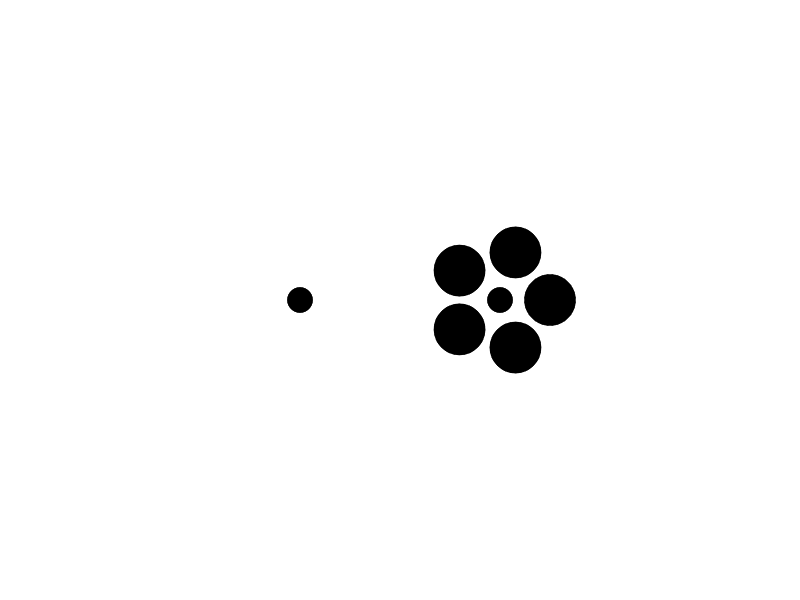

In [1]:
import psychopy
import psychopy.visual
import psychopy.event

win = psychopy.visual.Window(
    size=[800, 600], fullscr=False, screen=0,
    allowGUI=True, allowStencil=False,
    winType='pyglet', monitor='monitor_v1', 
    color=[1,1,1], colorSpace='rgb', 
    blendMode='avg', useFBO=True, units='pix')

# Circle 그려보기
circle = psychopy.visual.Circle(
    win=win,
    units="pix",
    radius=150,
    fillColor=[0, 0, 0],
    lineColor=[-1, -1, -1]
)

circle.draw()
win.flip()
psychopy.event.waitKeys()

# Circle Edge 부드럽게 하기
circle.edges=128

circle.draw()
win.flip()
psychopy.event.waitKeys()

# Ebbinghaus illusion 만들기
import psychopy.misc
# Note the use of a new function in the above code, psychopy.misc.pol2cart. 
# Often when creating visual stimuli it can be more intuitive to work in polar coordinates 
# (polar angle, radius) than cartesian coordinates (x, y). 
# We can use this function to easily convert from polar to cartesian.

circle = psychopy.visual.Circle(
    win=win,
    units="pix",
    fillColor=[-1] * 3, # [-1, -1, -1]
    lineColor=[-1] * 3, # [-1, -1, -1]
    edges=128
)

# 'test' circles
circle.radius = 12
test_offset = 100

for offset in [-1, +1]:
    circle.pos = [test_offset * offset, 0]
    circle.draw()
    
# 'surround' circles
surr_thetas = [0, 72, 144,  216,  288]
surr_r = 50

for i_surr in range(len(surr_thetas)):
    [surr_pos_x, surr_pos_y] = psychopy.misc.pol2cart(
        surr_thetas[i_surr],
        surr_r
    )
    surr_pos_x = surr_pos_x + test_offset
    circle.pos = [surr_pos_x, surr_pos_y]
    circle.radius = 25
    circle.draw()
    
win.flip()
win.getMovieFrame()
C = win.getMovieFrame()
psychopy.event.waitKeys()
win.close()

C

<br>

#####  Image 그리기

In [1]:
# Preparing the stimulus
import psychopy.visual
import psychopy.event

win = psychopy.visual.Window(
    size=[800, 600], fullscr=False, screen=0,
    allowGUI=True, allowStencil=False,
    winType='pyglet', monitor='monitor_v1', 
    color=[0,0,0], colorSpace='rgb', 
    blendMode='avg', useFBO=True, units='pix')

# 이미지 그리기
img = psychopy.visual.ImageStim( # help(visual.ImageStim), https://www.psychopy.org/api/visual/imagestim.html#psychopy.visual.ImageStim
                                 # https://www.psychopy.org/builder/components/image.html
    win=win,
    image="UNSW.png",
    units="norm",
    mask=None,
    ori=0, 
    pos=[0, 0], 
    # size=[0.311, 0.553], 값을 설정해주지 않으면 원래 이미지의 크기로 설정된다.
    opacity=1, 
    flipHoriz=False, # flip을 어떤 방향으로 시킬지 설정하는듯 ?
    flipVert=False,
    texRes=128, # mask나 texture의 resolution을 설정하는 듯 하다. 이건 default 값이고 이미지 파일의 resolution을 따라서 재설정될 것으로 예상된다. 
    interpolate=True # antialiasing
)

img.draw()
win.flip()
psychopy.event.waitKeys()

# 이미지 크기 조정
size_x = img.size[0]
size_y = img.size[1]

img.size = [size_x * 2, size_y * 2]
img.draw()
win.flip()
psychopy.event.waitKeys()

# 이미지의 transparency와 opacity

rect = psychopy.visual.Rect(
    win=win, width=200,
    height=100, pos=[0,-50],
    fillColor=[1] * 3,
    units='pix'
)

img = psychopy.visual.ImageStim( # help(visual.ImageStim), https://www.psychopy.org/api/visual/imagestim.html#psychopy.visual.ImageStim
                                 # https://www.psychopy.org/builder/components/image.html
    win=win, image="UNSW.png", units="norm",
    mask=None, ori=0, pos=[0, 0], 
    # size=[0.311, 0.553], 값을 설정해주지 않으면 원래 이미지의 크기로 설정된다.
    opacity=1, 
    flipHoriz=False, flipVert=False,
    texRes=128, interpolate=True 
)

rect.draw()
img.draw()
win.flip()
psychopy.event.waitKeys()

img.opacity = 0.5
rect.draw()
img.draw()
win.flip()
psychopy.event.waitKeys()

# 이미지 저장하기
win.getMovieFrame()
win.saveMovieFrames("unsw_logo_blend_example.png")

win.close()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


C:\Users\sorel\anaconda3\envs\th_py3.7.7\lib\site-packages\pyglet\media\codecs\wmf.py:838: UserWarning: [WinError -2147417850] 스레드 모드가 설정된 후에는 바꿀 수 없습니다
  warnings.warn(str(err))
C:\Users\sorel\anaconda3\envs\th_py3.7.7\lib\site-packages\pyglet\image\codecs\wic.py:292: UserWarning: [WinError -2147417850] 스레드 모드가 설정된 후에는 바꿀 수 없습니다
  warnings.warn(str(err))


#####  Dots 그리기

In [2]:
import random
import psychopy.visual
import psychopy.event

win = psychopy.visual.Window(
    size=[800, 600], fullscr=False, screen=0,
    allowGUI=True, allowStencil=False,
    winType='pyglet', monitor='monitor_v1', 
    color=[0,0,0], colorSpace='rgb', 
    blendMode='avg', useFBO=True, units='pix')


# 화면의 무작위 위치에 검은색 점 200개 그리기
n_dots = 200
dot_xys = []

for dot in range(n_dots):

    dot_x = random.uniform(-350, 350)
    dot_y = random.uniform(-250, 250)

    dot_xys.append([dot_x, dot_y])
    
dot_stim = psychopy.visual.ElementArrayStim(
           # help(psychopy.visual.ElementArrayStim)
           # https://www.psychopy.org/api/visual/elementarraystim.html
    win=win,
    units="pix",
    nElements=n_dots,
    elementTex=None, # texture를 어떻게 그릴지 선택한다.
    elementMask="circle",
    xys=dot_xys,
    sizes=10,
    colors=(-1.0, -1.0, -1.0), 
    colorSpace='rgb'
)

dot_stim.draw()
win.flip()
psychopy.event.waitKeys()

# dot_stim에서 elementMask를 None으로 바꿔보기
dot_stim.elementMask=None
dot_stim.colors=(1.0, 1.0, 1.0)
dot_stim.draw()
win.flip()
psychopy.event.waitKeys()

# dot_stim에서 elemntTex와 orientation 바꿔보기
# -> random gabor!

n_dots = 50
dot_xys = []
dot_oris = []

for dot in range(n_dots):
    dot_x = random.uniform(-350, 350)
    dot_y = random.uniform(-250, 250)
    dot_xys.append([dot_x, dot_y])
    dot_oris.append(random.uniform(0, 180))

dot_stim.nElements=n_dots
dot_stim.xys=dot_xys
dot_stim.oris=dot_oris
dot_stim.elementMask="gauss"
dot_stim.elementTex="sin"
dot_stim.sfs=(10.0/2.5)
# the sfs parameter when units="pix" is the number of cycles per element, 
# rather than the number of cycles per pixel.
dot_stim.phases=0 # Phase는 wave의 시작점을 조절한다. 
dot_stim.sizes=60

dot_stim.draw()
win.flip()
psychopy.event.waitKeys()

win.close()

<br>

#### Temporal Dynamic 조정하기

<br> 

* Time and Clocks
* Drawing dynamic stimuli
* Controlling the trial schedule

<br>

##### Time and Clocks

<br>

One important way in which we can manipulate the temporal dynamics of our programs is to be able to track time. We can do this in psychopy by creating a psychopy.core.Clock(), which has a getTime() function that tells us how many seconds have elapsed since the clock was created.

<br>

In [2]:
import psychopy.core 
# core : psychopy의 기본적인 핵심 함수들을 불러오기위한 모듈 (e.g., clocks)

clock = psychopy.core.Clock()
# help(core.Clock), 시간을 기록할 수 있는 시계를 활성화하고 현재 시간을 기록한다.
# 시계를 초기화하기위해서는 ~.reset()을 수행한다.
# 시계 활성화 후 지난 시간을 초단위로 확인하기 위해 ~.getTime()을 수행한다.
# 특정 시간 동안 기다리기 위해서(waitSecs와 유사)는 core.wait(secs)를 활용한다.

for iteration in range(2):
    psychopy.core.wait(2.0) # 2초 간 일시정지, PTB의 waitSecs와 유사
    print(clock.getTime())
    
# 실험이나 trial의 소요 시간이나 Routine 내 component의 RT를 기록하기 위해서는 활용할 수 있을 듯.

2.000322199994116
4.001528699998744


<br>

We can use such a clock as a simple way of presenting a stimulus for a desired duration. For example, we could show a grating for 500ms by:

<br>

In [ ]:
# set font of text stimuli
fFile = ['C:\\WINDOWS\\Fonts\\NotoSansCJKkr-Medium.otf']
fName ='Noto Sans CJK KR Medium' 

# load module
import psychopy.visual
import psychopy.event
import psychopy.core

# set window
win = psychopy.visual.Window(
    size=[800, 600], fullscr=False, screen=0,
    allowGUI=True, allowStencil=False,
    winType='pyglet', monitor='monitor_v1', 
    color=[1,1,1], colorSpace='rgb', 
    blendMode='avg', useFBO=True, units='pix')

# set text stimulus
text = psychopy.visual.TextStim(
    win=win, name='text', 
    text='', 
    fontFiles=fFile, font=fName, 
    units='norm', pos=(0, 0), height=0.1, wrapWidth=None, ori=0, 
    color=[-1,-1,-1], colorSpace='rgb', italic=False, bold=False, 
    antialias=True, opacity=1, languageStyle='LTR', depth=0.0)

# set grating stimulus
grating = psychopy.visual.GratingStim(
    win=win,
    size=[200, 200],
    mask="circle",
    units="pix",
    sf=5.0 / 200.0)

# initialize clock
clock = psychopy.core.Clock()

# set message of text stimulus
text.text = "Grating을 2500ms 동안 제시합니다.\n\n시작하려면 아무 키나 누르세요."

# draw and flip
text.draw()
win.flip()
psychopy.event.waitKeys()

# reset clock
clock.reset()

# 2.5초 동안 grating 보여주기
while clock.getTime() < 2.5:
    grating.draw()
    win.flip()

# draw and flip
text.text = "끝내려면 아무키나 누르세요."
text.draw()
win.flip()
psychopy.event.waitKeys()

win.close()

<br>

The key lines are highlighted in the above code. First, we reset the clock to zero. Then, we use a while loop to draw the grating and update the window for as long as the time that has elapsed (which we find out by calling clock.getTime()) is less than how long we want to show the grating for (2500ms, or 2.5 seconds).

<br>

The above method is fine for experiments in which precise timing is not required. Uncertainties in timing that arise using this approach come about, in part, due to the way that the window is updated. Have a think about the while loop above—how frequently do you think the grating will be drawn and the window updated? Typically, this is limited by the monitor’s “refresh rate”, which specifies how often it updates. This is measured in hertz (Hz), and 60Hz is a common rate for LCD monitors.

<br>

If we are confident that the precise refresh rate is known and that it is stable (neither of which can happen without specialised testing), we can instead present our stimuli for a given number of “flips” (known as a given number of “frames”). For example, if we know that our monitor updates at 60 frames per second and we want to draw a grating for 2500ms, we can draw 150 frames:

<br>

In [ ]:
fFile = ['C:\\WINDOWS\\Fonts\\NotoSansCJKkr-Medium.otf']
fName ='Noto Sans CJK KR Medium' 

import psychopy.visual
import psychopy.event

win = psychopy.visual.Window(
    size=[800, 600], fullscr=False, screen=0,
    allowGUI=True, allowStencil=False,
    winType='pyglet', monitor='monitor_v1', 
    color=[1,1,1], colorSpace='rgb', 
    blendMode='avg', useFBO=True, units='pix')

text = psychopy.visual.TextStim(
    win=win, name='text', 
    text='', 
    fontFiles=fFile, font=fName, 
    units='norm', pos=(0, 0), height=0.1, wrapWidth=None, ori=0, 
    color=[-1,-1,-1], colorSpace='rgb', italic=False, bold=False, 
    antialias=True, opacity=1, languageStyle='LTR', depth=0.0)

grating = psychopy.visual.GratingStim(
    win=win,
    size=[200, 200],
    mask="gauss",
    units="pix",
    sf=5.0 / 200.0
)

text.text = "Grating을 2500ms 동안 제시합니다.\n\n시작하려면 아무 키나 누르세요."
text.draw()
win.flip()
psychopy.event.waitKeys()

for frame in range(150):
    grating.draw()
    win.flip()

text.text = "끝내려면 아무키나 누르세요."
text.draw()
win.flip()
psychopy.event.waitKeys()

win.close()

##### Drawing dynamic stimuli

<br>

Now that we know about timing and clocks, let’s use them to draw a moving stimulus. What we’d like to do is draw a grating that changes phase such that it moves through two complete cycles in one second. We can do that via code such as (note that there are a few new elements to this code—we will go through it below):

<br> 

In [1]:
fFile = ['C:\\WINDOWS\\Fonts\\NotoSansCJKkr-Medium.otf']
fName ='Noto Sans CJK KR Medium' 

import numpy as np
import psychopy.visual
import psychopy.event
import psychopy.core

win = psychopy.visual.Window(
    size=[800, 600], fullscr=False, screen=0,
    allowGUI=True, allowStencil=False,
    winType='pyglet', monitor='monitor_v1', 
    color=[1,1,1], colorSpace='rgb', 
    blendMode='avg', useFBO=True, units='pix')

text = psychopy.visual.TextStim(
    win=win, name='text', 
    text='', 
    fontFiles=fFile, font=fName, 
    units='norm', pos=(0, 0), height=0.1, wrapWidth=None, ori=0, 
    color=[-1,-1,-1], colorSpace='rgb', italic=False, bold=False, 
    antialias=True, opacity=1, languageStyle='LTR', depth=0.0)

grating = psychopy.visual.GratingStim(
    win=win,
    size=[200, 200],
    mask="circle",
    units="pix",
    sf=5.0 / 200.0
)

text.text='키를 누를 때까지 phase가 변화합니다.\n\n시작하려면 아무 키나 누르세요.'
text.draw()
win.flip()
psychopy.event.waitKeys()

clock = psychopy.core.Clock()

keep_going = True
while keep_going:
    grating.phase = np.mod(clock.getTime() / 1, 1)
    # help(numpy.mod)
    # mod(x,y) - x에서 y를 나눈 나머지를 반환한다.
    # 여기서는 clock 활성화 후 지나는 시간초(0, 1, 2, ...) / 0.5(속도 조절)에
    # 1을 나누고 나머지를 반환하도록 설정하였다. 이 방법을 사용하면 항상 나머지가 
    # 0~1 사이의 값으로 나타난다.
    # 예를 들어, 시간 초가 2.5초면, 1을 나누면 0.5가 남게 된다.
    grating.draw()
    win.flip()
    keys = psychopy.event.getKeys()
    # 아무키나 누르면 keys에 기록한다.

    if len(keys) > 0:
        keep_going = False
win.close()

print(keys)

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


C:\Users\sorel\anaconda3\envs\th_py3.7.7\lib\site-packages\pyglet\media\codecs\wmf.py:838: UserWarning: [WinError -2147417850] 스레드 모드가 설정된 후에는 바꿀 수 없습니다
  warnings.warn(str(err))
C:\Users\sorel\anaconda3\envs\th_py3.7.7\lib\site-packages\pyglet\image\codecs\wic.py:292: UserWarning: [WinError -2147417850] 스레드 모드가 설정된 후에는 바꿀 수 없습니다
  warnings.warn(str(err))


['space']


<br>

The first new thing is the structure of our loop. We first set a boolean variable keep_going to True. We will use this to indicate whether the user has pressed a key to indicate that they’d like the program to finish. Because we don’t know when this will be, we use a while loop to keep repeating until keep_going becomes False.

<br>

The second new thing is the way we are setting the phase of the grating. Recall that the phase is specified by a value that is between 0 and 1. Let’s start by thinking about what would happen if we wanted the grating to move through one complete cycle in one second (rather than the two cycles per second we want it to have eventually). We can think of that as wanting the grating’s phase to change from 0 to 1 across the course of 1 second of time. Hence, we could simply divide the time, in seconds, by 1 in order to determine the phase. However, remember that the phase needs to be between 0 and 1; as soon as the time is greater than one second, the phase value will be greater than 1. We can fix this by using the mod command, which effectively “wraps” the value back around on itself (e.g. 1.2 mod 1 is 0.2, 2.7 mod 1 is 0.7, etc.). The way it does this is by dividing the first number by the second and returning the remainder.

<br>

Having established the necessary phase at a given point in time, we use it to update the phase of the grating stimulus. Because this statement is operating within the while loop, it is being frequently evaluated and so the grating is frequently changing phase. This change in phase over time gives the visual appearance of a smoothly moving grating.

<br>

The final new thing is how we handle the keyboard. In the past, we have used the psychopy.event.waitKeys() function, which halts execution until a key is pressed. We can’t use that here because we wouldn’t be able to update our stimulus if we’re waiting for a keypress. Instead, we use the psychopy.event.getKeys() function, which probes the state of the keyboard at that precise moment and returns immediately a list of the keys that are being pressed. If a key has been pressed, this list will have a length (len) that is greater than zero—in this case, we set our keep_going variable to False so that we can exit out of the while loop.

<br>

##### Controlling the trial schedule

<br>

We can using timing and clocks to control the temporal schedule of a given trial in an experiment. For example, we may want to start the trial with 500ms of no stimulus, then show a stimulus for 500ms, then wait for a participant to respond. Furthermore, we wish to require a minimum of 2 seconds between trials. We can do that via:

<br>

In [4]:
fFile = ['C:\\WINDOWS\\Fonts\\NotoSansCJKkr-Medium.otf']
fName ='Noto Sans CJK KR Medium' 

import numpy as np
import psychopy.visual
import psychopy.event
import psychopy.core

win = psychopy.visual.Window(
    size=[800, 600], fullscr=False, screen=0,
    allowGUI=True, allowStencil=False,
    winType='pyglet', monitor='monitor_v1', 
    color=[1,1,1], colorSpace='rgb', 
    blendMode='avg', useFBO=True, units='pix')

text = psychopy.visual.TextStim(
    win=win, name='text', 
    text='', 
    fontFiles=fFile, font=fName, 
    units='norm', pos=(0, 0), height=0.1, wrapWidth=None, ori=0, 
    color=[-1,-1,-1], colorSpace='rgb', italic=False, bold=False, 
    antialias=True, opacity=1, languageStyle='LTR', depth=0.0)

grating = psychopy.visual.GratingStim(
    win=win,
    size=[200, 200],
    mask="circle",
    units="pix",
    sf=5.0 / 200.0
)

clock = psychopy.core.Clock() # 시계 활성화


n_trials = 4 # 시행수
pre_duration_s = 0.5 # blank
stim_duration_s = 2  # stim presentation 
min_iti = 2.0

for trial in range(n_trials):

    clock.reset()

    # wait until the 'pre' time has passed
    while clock.getTime() < pre_duration_s:
        win.flip()

    while clock.getTime() < pre_duration_s + stim_duration_s:
        grating.draw()
        win.flip()

    # clear the window
    win.flip()

    keys = psychopy.event.waitKeys()

    while clock.getTime() < min_iti:
        win.flip()

win.close()

##### 응용하기

<br>

In [6]:
# 응용하기
import random
import psychopy.core
import psychopy.event
import psychopy.visual
import numpy as np
fFile = ['C:\\WINDOWS\\Fonts\\NotoSansCJKkr-Medium.otf']
fName = 'Noto Sans CJK KR Medium'

win = psychopy.visual.Window(
    size=[800, 600], fullscr=False, screen=0,
    allowGUI=True, allowStencil=False,
    winType='pyglet', monitor='monitor_v1',
    color=[1, 1, 1], colorSpace='rgb',
    blendMode='avg', useFBO=True, units='pix')

text = psychopy.visual.TextStim(
    win=win, name='text',
    text='',
    fontFiles=fFile, font=fName,
    units='norm', pos=(0, 0), height=0.1, wrapWidth=None, ori=0,
    color=[-1, -1, -1], colorSpace='rgb', italic=False, bold=False,
    antialias=True, opacity=1, languageStyle='LTR', depth=0.0)

fix = psychopy.visual.ShapeStim(
    win=win, name='fix', vertices='cross', units='pix', 
    size=(30, 30),
    ori=0, pos=(0, 0),
    lineWidth=1, lineColor=[1,0,0], lineColorSpace='rgb',
    fillColor=[1,0,0], fillColorSpace='rgb',
    opacity=1, depth=0.0, interpolate=True)

n_dots = 80
text.text = '절차를 시작합니다.\n\n80개의 검은 점이 무작위 위치에 200ms 마다 점멸합니다.\n\n총 5시행 반복됩니다.\n\n시작하려면 아무 키나 누르세요'
text.draw()
win.flip()
psychopy.event.waitKeys()

n_trials = 5  # 시행수
pre_duration_s = 0.5  # blank
stim_duration_s = 5  # stim presentation

clock = psychopy.core.Clock()  # 시계 활성화

for i in range(n_trials):
    
    clock.reset()

    # wait until the 'pre' time has passed
    while clock.getTime() < pre_duration_s:
        win.flip()
    
    keepGoing = True
    while clock.getTime() < pre_duration_s+stim_duration_s and keepGoing:
        
        dot_xys = []
        for dot in range(n_dots):
            dot_x = random.uniform(-350, 350)
            dot_y = random.uniform(-250, 250)
            dot_xys.append([dot_x, dot_y])
        
        dot_stim = psychopy.visual.ElementArrayStim(
            win=win, units="pix", nElements=n_dots, elementTex=None,
            elementMask="circle", xys=dot_xys, sizes=15,
            colors=[-1.0, -1.0, -1.0], colorSpace="rgb")
        
        for frame in range(12):
            dot_stim.draw()
            fix.draw()
            win.flip()
            keys = psychopy.event.getKeys()
            if len(keys) > 0:
                keepGoing = False
        
        for frame in range(12):
            fix.draw()
            win.flip()
            keys = psychopy.event.getKeys()
            if len(keys) > 0:
                keepGoing = False
                
                

for frame in range(30):
    win.flip()

text.text = '모든 절차가 끝났습니다.\n\n끝내려면 아무키나 누르세요'
text.draw()
win.flip()
psychopy.event.waitKeys()

win.close()         

<br>

#### Response 수집하기

<br>

* Knowing which keys were pressed
* Restricting the available keys
* Determining when a key was pressed

<br>

We have already encountered the way in which we can collect participant responses via our use of psychopy.event.waitKeys() and psychopy.event.getKeys(). Here, we will take a closer look at these functions and how we can use them in vision science experiments.

<br>


##### Knowing which keys were pressed

<br>

We often want to know which key was pressed, not just that any of the keys were pressed. The “key” functions in psychopy return a list of strings, where each item in the list is a string representation of the key that was pressed. For example, if we run the following and press the “d” key, we can see that the item in the list is “d”:

<br>

In [8]:
import psychopy.visual
import psychopy.event

win = psychopy.visual.Window(
    size=[800, 600], fullscr=False, screen=0,
    allowGUI=True, allowStencil=False,
    winType='pyglet', monitor='monitor_v1',
    color=[1, 1, 1], colorSpace='rgb',
    blendMode='avg', useFBO=True, units='pix')

keys = psychopy.event.waitKeys()

print(keys)

win.close()

# 

['space']


<br>

* Tips
    * Why is keys a list, rather than just a string? This is to account for a situation in which multiple keys are pressed simultaneously.
    
<br>

The string that represents the key that was pressed is straightforward for most of the keys. However, we often want to use the “arrow” keys, and it is not immediately obvious what the string representation will be. Let’s have a look by running the above again but pressing the “left arrow” key:

<br>

In [10]:
import psychopy.visual
import psychopy.event

win = psychopy.visual.Window(
    size=[800, 600], fullscr=False, screen=0,
    allowGUI=True, allowStencil=False,
    winType='pyglet', monitor='monitor_v1',
    color=[1, 1, 1], colorSpace='rgb',
    blendMode='avg', useFBO=True, units='pix')

keys = psychopy.event.waitKeys()

print(keys)

win.close()

['left']
1664.7709 	WARNING 	Monitor specification not found. Creating a temporary one...


<br>

As you can see, the arrow keys correspond to “left”, “right”, “up”, and “down”. If you are unsure what the string representation of a particular key is, you can use a method like that shown above to find out.

<br>

##### Restricting the available keys

<br>

During an experiment, a participant usually only has a narrow range of keys that are meaningful. To prevent an accidental keypress prematurely ending a call to waitKeys, we can provide a keyList argument that restricts the keys that it “listens” to. For example, if we know that participants can only respond by pressing the left or right arrow key, it is often sensible to use:

<br>

In [12]:
import psychopy.visual
import psychopy.event

win = psychopy.visual.Window(
    size=[800, 600], fullscr=False, screen=0,
    allowGUI=True, allowStencil=False,
    winType='pyglet', monitor='monitor_v1',
    color=[1, 1, 1], colorSpace='rgb',
    blendMode='avg', useFBO=True, units='pix')

keys = psychopy.event.waitKeys(keyList=["left", "right"])

win.close()

print(keys)

['left']


<br>

This way, the only way that waitKeys will return is if the left or right arrow key is pressed—it will keep waiting if another key, such as the spacebar, is pressed.

<br>

##### Determining when a key was pressed

<br>

It can also be useful know the time that a keypress was made (such as in studies of reaction time, though care needs to be taken if precise time estimates are required). We can easily obtain this information by providing a timeStamped argument with a timing clock:

<br>

In [13]:
import psychopy.visual
import psychopy.event
import psychopy.core

win = psychopy.visual.Window(
    size=[800, 600], fullscr=False, screen=0,
    allowGUI=True, allowStencil=False,
    winType='pyglet', monitor='monitor_v1',
    color=[1, 1, 1], colorSpace='rgb',
    blendMode='avg', useFBO=True, units='pix')

clock = psychopy.core.Clock()
keys = psychopy.event.waitKeys(timeStamped=clock)

print(keys)

win.close()

[['left', 0.8439703000040026]]


<br>

You can see that what is being returned to us now is a list of lists (technically a list of tuples, which are similar to lists), where each item in the list is a pairing of the key that was pressed and the time it was pressed, relative to the clock timing that was provided to the function.

<br>

<br>

#### GUI로 parameter input 제공하기

<br>

Typically when we run an experiment we would like it to be as close to identical for all participants (within a common group, at least) as possible. However, there are often aspects that are specific to a particular time at which you are executing your program. For example, you might want to provide a participant identifier in order to save the data in a particular location, or you might want to give a repeat number, or perhaps a condition number, etc.

<br>

A straightforward way to do this in psychopy is to build a simple GUI (Graphical User Interface) that is displayed when the program starts. The user can then input the required information, which is then available to the rest of the program.

<br>

We begin creating such a GUI by using **psychopy.gui.Dlg()**.

After creating it, we add various elements to it before using its show function. Without any elements yet, it would look something like:

<br>

In [14]:
import psychopy.gui

gui = psychopy.gui.Dlg()
gui.show()

[]

<br>

Let’s add a field so that the user can provide a subject ID and a run number. I’ll enter “p1000” as the subject ID and “1” as the run number.

<br>

In [16]:
import psychopy.gui

gui = psychopy.gui.Dlg()

gui.addField("Subject ID:")
gui.addField("Condition Num:")

gui.show()

print(gui.data)

['1', '2']


<br>

As you can see, the ****gui.data**** property holds a list where the items are the GUI elements, in the order they were added.

<br>

* Tip
    * Don’t worry about the “u” characters in front of the quotation marks in the output. You can just treat them like regular strings.

<br>

Also note that information like the condition number is represented as a string, whereas we may want it as an integer. It is straightforward to convert a string to an integer by using the int function. For example:

<br>

In [17]:
import psychopy.gui

gui = psychopy.gui.Dlg()

gui.addField("Subject ID:")
gui.addField("Condition Num:")

gui.show()

subj_id = gui.data[0]
cond_num = int(gui.data[1])

print(subj_id, cond_num)

1 1


<br>

#### data 저장하기

<br>

* Creating and checking a file location
* Organising data output
* Saving data

<br> 

The typical purpose of running an experiment is to generate some data that we can use to address our question of interest. Hence, it is important that we are able to store the data generated by our experiments to a file on disk.

<br>

##### Creating and checking a file location

<br>

The first step in saving data from an experiment is knowing where to save the data to. A common scenario is to save the data from each session (subject and repeat, perhaps condition) to a separate file. This approach maximises the flexibility for subsequent analyses. We may end up with a file name such as **p1000_exp_cond_1_rep_1.csv**.

<br>

A useful step at this point is to check that a file with this name doesn’t already exist—it is very frustrating to lose data because it was overwritten! This is also best done right at the start of an experiment, before any data is collected, so that the impact of a wrong filename is minimised. We can check whether the file already exists by using os.path.exists:

<br>

In [18]:
import os

data_path = "p1000_exp_cond_1_rep_1.csv"
data_path_exists = os.path.exists(data_path)

print(data_path_exists)

False


<br>

If the file already exists, a safe strategy would be to exit the program at this point and tell the user about the problem. One way to do this is to use the **sys.exit** function:

<br>

In [24]:
import os
import sys

print(os.getcwd()) # 현재 경로 확인하기
# os.chdir(r'') 경로 바꾸기

data_path = "p1000_exp_cond_1_rep_1.csv"
data_path_exists = os.path.exists(data_path)

print(data_path_exists)

# we will pretend that it does exist
data_path_exists = True

if data_path_exists:
    sys.exit("Filename " + data_path + " already exists!")

D:\Dropbox\3.Python\for_PychoPy
False


SystemExit: Filename p1000_exp_cond_1_rep_1.csv already exists!

##### Organising data output

<br>

While the data you collect in an experiment may come in many forms, it is best to work out a way in which the data can be represented in a “tabular” form; that is, consisting of rows and columns. This is the easiest format with which to store data on disk.

<br>

For example, say your experiment consists of 10 trials where each trial shows a grating at a particular orientation and records whether the participant pressed the left or right arrow key in response. This could be organised in the data file as 10 rows and 2 columns; each row represents a trial, and the two columns give the grating orientation and the response on that particular trial. For example

<br>

In [27]:
import random
import pprint
# pprint - “pretty printer” to show the contents of data, 
#          as it makes the tabular organisation clearer.

data = []
for trial in range(10):
    data.append(
        [
            # random.uniform(0, 180),
            random.randrange(1,11),
            random.choice(["left", "right"])
        ]
    )

pprint.pprint(data)

[[1, 'right'],
 [4, 'left'],
 [6, 'left'],
 [9, 'left'],
 [7, 'left'],
 [5, 'right'],
 [6, 'left'],
 [6, 'left'],
 [1, 'right'],
 [3, 'right']]


<br>

However, to make it easier to save and load data to disk, we often convert strings into numbers by coding them. For example, rather than having “left” and “right”, we might use the numbers 1 and 2 to refer to the keys that were pressed.

<br>

In [30]:
import random
import pprint

data = []

for trial in range(10):

    data.append(
        [
            random.randrange(1,11),
            random.choice(["left", "right"])
        ]
    )

pprint.pprint(data)

print("")

coded_data = []

# data 코딩 시 참고
for data_row in data:

    if data_row[1] == "left":
        data_row[1] = 1
    elif data_row[1] == "right":
        data_row[1] = 2

    coded_data.append(data_row)

pprint.pprint(coded_data)

[[2, 'right'],
 [10, 'right'],
 [2, 'left'],
 [9, 'left'],
 [1, 'right'],
 [4, 'left'],
 [9, 'left'],
 [4, 'left'],
 [8, 'right'],
 [6, 'right']]

[[2, 2],
 [10, 2],
 [2, 1],
 [9, 1],
 [1, 2],
 [4, 1],
 [9, 1],
 [4, 1],
 [8, 2],
 [6, 2]]


##### Saving data

<br>

Once we have our data assembled in a suitable format (i.e. list of lists, as above), we can save it to disk using the np.savetxt function. The first argument is the filename, and the second is the variable containing the data to be saved. We will also specify an optional argument called delimiter, which we will set as "\t". This tells the savetxt function that we want columns to be separated by a TAB character. This is a common way of storing files, and is reflected in the data’s filename (with “tsv” standing for “tab separated values”).

csv -> comma separated values

<br>

In [1]:
import random
import numpy as np
import pprint

data = []

for trial in range(10):

    data.append(
        [
            random.uniform(0, 180),
            random.choice([1, 2])
        ]
    )

pprint.pprint(data)

np.savetxt(
    "p1000_exp_cond_1_run_2.tsv",
    data,
    fmt='%.2e',
    delimiter="\t"
)

np.savetxt(
    "p1000_exp_cond_1_run_2.csv",
    data,
    # fmt='%0.3f', # 소수점 두자리 수까지 저장하기, 소수점을 "버림"한다는 점에 유의한다.
    fmt='%d',    # 정수는 %d
    delimiter=","
)

[[169.31921469147318, 2],
 [126.17744792762693, 1],
 [163.92576668543242, 1],
 [103.71317066434862, 1],
 [34.84229557344506, 2],
 [156.68295833902434, 2],
 [57.37272423750636, 2],
 [117.84858853122718, 2],
 [9.55529804989733, 1],
 [41.23172974329806, 2]]


<br>

We can then go and load the data using loadtxt to verify that we are indeed able to do so:

<br>

In [46]:
import numpy as np
import pprint

data = np.loadtxt(
    "p1000_exp_cond_1_run_2.csv",
    delimiter=","
)

pprint.pprint(data.tolist())

[[74.0, 1.0],
 [92.0, 1.0],
 [78.0, 1.0],
 [155.0, 2.0],
 [158.0, 2.0],
 [63.0, 2.0],
 [62.0, 2.0],
 [87.0, 2.0],
 [66.0, 1.0],
 [24.0, 1.0]]


---

<br>

### Python으로 event matrix 만들기

<br>

* Matlab의 event matrix 만드는 방법을 참고하여 event matrix를 만들어본다.
* 참고 자료는 아래와 같다.

<br>

---

prompt = {'Enter subject number: ','Enter 3 initials (e.g. THK): ', 'PE CB (1~6): ', 'Enter Btw Factor (1 = Exp, 2 = Con): '};
defaults = {'99','','0','1'};
answer = inputdlg(prompt, 'Experimental setup information',1,defaults);
[SN, NM, PE_CB, BTW] = deal(answer{:});
% open files and specify file format
SN=str2double(SN);
BTW=str2double(BTW);
PE_CB = str2double(PE_CB);

% if mod(SN,2) == 1 % Rule A + Cat A | Rule B + Cat B || Error - Cons 2 -> Cat A
%     CB_factor = 1; WTN = 1;
% elseif mod(SN,2) == 0 % Rule A + Cat A | Rule B + Cat B || Error - Cons 2 -> Cat B
%     CB_factor = 2; WTN = 2;
% end

fileNAME=sprintf('MemUdt_PE_s%02d%s_btw%d_loading', SN, NM, BTW);

%% -------------------------------------------------- STIMULUS CONFIGURATION

% set Stimuli
path = cell(1,4);
path{1} = fullfile(pwd, 'stimuli', 'object', '\');   % Manmade Object 240
path{2} = fullfile(pwd, 'stimuli', 'cue', '\');       % Color Square Cue or Symbolic Cue
path{3} = fullfile(pwd, 'stimuli', 'cue_association', '\');  % Color Square Cue or Symbolic Cue
path{4} = fullfile(pwd, 'stimuli', 'response', '\');  % 

list = cell(1,4);
list{1} = dir([path{1} '*.jpg']); % Object
list{2} = dir([path{2} '*.jpg']); % Cue
list{3} = dir([path{3} '*.jpg']); % Association Cue
list{4} = dir([path{4} '*.jpg']); % Response

cue_list=cell(1,3); im_cue = (1:3);
for a = 1:3
    cue_list{a} = list{2}(im_cue(a)).name;
end

CuePic_1 = imread(fullfile(path{2}, cue_list{1}));
CuePic_2 = imread(fullfile(path{2}, cue_list{2}));
CuePic_3 = imread(fullfile(path{2}, cue_list{3}));

% % set TextRect
% textSrcRect = [0 0 500 500];
% textDstRect{1} = CenterRectOnPoint(textSrcRect, cx, cy);
% textDstRect{2} = CenterRectOnPoint(textSrcRect, cx, cy+70);
% textDstRect{3} = CenterRectOnPoint(textSrcRect, cx, cy-70);
% 
% % set Fixation
% sizeFix = [18, 12]; % 응시점 설정
% colorFix = [[0, 0, 0]; [255, 255, 255]; [150, 150, 150]; [255, 0, 0]]; % colorFix(1,:), colorFix(2,:)

% Stimulus Preparation
xnumIM = length(list{1});
xorderIM = Shuffle(1:xnumIM); % order randomization

orderIM_t1 = cell(1,3); orderIM_t4 = cell(1,3); 
orderIM_t1{1, 1} = xorderIM(1:30); orderIM_t1{1, 2} = xorderIM(31:60); orderIM_t1{1, 3} = xorderIM(61:90);
orderIM_t4{1, 1} = xorderIM(91:120); orderIM_t4{1, 2} = xorderIM(121:150); orderIM_t4{1, 3} = xorderIM(151:180); 
orderIM_t6{1, 1} = xorderIM(181:270);

%% -------------------------------------------------- EVENT MATRIX
%% Task 1 : Day 1 - Cue-Set 1 Association Learning

task1 = struct();
cCue_t1 = 3; % Symbol Cue 1, 2, 3
cRep_t1 = 30; % 8회 반복. -> 조건당 64개
cBlk_t1 = 4;

bTrial_t1 = cCue_t1 * cRep_t1; % 80
bIndex_t1 = 0:(bTrial_t1-1);

for xBlk = 1:cBlk_t1
    task1(xBlk).cCue = bIndex_t1;  % Symbol Cue
    task1(xBlk).cCue(mod(bIndex_t1, cCue_t1)==0) = 1; % cue 1
    task1(xBlk).cCue(mod(bIndex_t1, cCue_t1)==1) = 2; % cue 2
    task1(xBlk).cCue(mod(bIndex_t1, cCue_t1)==2) = 3; % cue 3
    task1(xBlk).cCue = Shuffle(task1(xBlk).cCue);
    task1(xBlk).tTrial = 1+(bTrial_t1*(xBlk-1)):bTrial_t1*(xBlk);
    task1(xBlk).dBlk = ones(1, bTrial_t1)*xBlk;
    task1(xBlk).bTrial = 1:bTrial_t1;
    
    task1(xBlk).xIMidx = zeros(1, bTrial_t1);
    task1(xBlk).xIMidx(task1(xBlk).cCue == 1) = Shuffle(orderIM_t1{1,1});
    task1(xBlk).xIMidx(task1(xBlk).cCue == 2) = Shuffle(orderIM_t1{1,2});
    task1(xBlk).xIMidx(task1(xBlk).cCue == 3) = Shuffle(orderIM_t1{1,3});
    
    task1(xBlk).dIMname = cell(1, bTrial_t1);
    for tt = 1:bTrial_t1
        task1(xBlk).dIMname{tt} = list{1}(task1(xBlk).xIMidx(tt)).name;
    end
    
    task1(xBlk).dCuename = cell(1, bTrial_t1);
    for a = 1:bTrial_t1
        if task1(xBlk).cCue(a) == 1
            task1(xBlk).dCuename{a} = cue_list{1};
        elseif task1(xBlk).cCue(a) == 2
            task1(xBlk).dCuename{a} = cue_list{2};
        elseif task1(xBlk).cCue(a) == 3
            task1(xBlk).dCuename{a} = cue_list{3};
        end
    end
    
    task1(xBlk).dResp = ones(1, bTrial_t1)*7;
    task1(xBlk).dRT = zeros(1, bTrial_t1);
    task1(xBlk).dCorr = ones(1, bTrial_t1)*7;
    task1(xBlk).dMeanRT = [];
    task1(xBlk).dAcc = [];
end

%% Task 2 : Day 1 - Cue-Set 1 Association Test

task2 = struct();
cCue_t2 = 3; % Symbol Cue 1, 2, 3, 4 -> 1,2 - Cat 1 / 3, 4 - Cat 2
cRep_t2 = 30; % 8회 반복. -> 조건당 64개
cBlk_t2 = 4;

bTrial_t2 = cCue_t2 * cRep_t2; % 80
bIndex_t2 = 0:(bTrial_t2-1);

for xBlk = 1:cBlk_t2
    task2(xBlk).cCue = bIndex_t2;  % Symbol Cue
    task2(xBlk).cCue(mod(bIndex_t2, cCue_t2)==0) = 1; % cue 1
    task2(xBlk).cCue(mod(bIndex_t2, cCue_t2)==1) = 2; % cue 2
    task2(xBlk).cCue(mod(bIndex_t2, cCue_t2)==2) = 3; % cue 3
    task2(xBlk).cCue = Shuffle(task2(xBlk).cCue);
 
    task2(xBlk).tTrial = 1+(bTrial_t2*(xBlk-1)):bTrial_t2*(xBlk);
    task2(xBlk).dBlk = ones(1, bTrial_t2)*xBlk;
    task2(xBlk).bTrial = 1:bTrial_t2;
    
    task2(xBlk).xIMidx = zeros(1, bTrial_t2);
    task2(xBlk).xIMidx(task2(xBlk).cCue == 1) = Shuffle(task1(xBlk).xIMidx(task1(xBlk).cCue == 1));
    task2(xBlk).xIMidx(task2(xBlk).cCue == 2) = Shuffle(task1(xBlk).xIMidx(task1(xBlk).cCue == 2));
    task2(xBlk).xIMidx(task2(xBlk).cCue == 3) = Shuffle(task1(xBlk).xIMidx(task1(xBlk).cCue == 3));
    
    task2(xBlk).dIMname = cell(1, bTrial_t2);
    for tt = 1:bTrial_t2
        task2(xBlk).dIMname{tt} = list{1}(task2(xBlk).xIMidx(tt)).name;
    end
    
    task2(xBlk).dCuename = cell(1, bTrial_t2);
    for a = 1:bTrial_t2
        if task2(xBlk).cCue(a) == 1
            task2(xBlk).dCuename{a} = cue_list{1};
        elseif task2(xBlk).cCue(a) == 2
            task2(xBlk).dCuename{a} = cue_list{2};
        elseif task2(xBlk).cCue(a) == 3
            task2(xBlk).dCuename{a} = cue_list{3};
        end
    end
    
    task2(xBlk).dResp = ones(1, bTrial_t2)*7;
    task2(xBlk).dRT = zeros(1, bTrial_t2);
    task2(xBlk).dCorr = ones(1, bTrial_t2)*7;
    task2(xBlk).dMeanRT = [];
    task2(xBlk).dAcc = [];
end
'''

<br>

In [ ]:

# 모듈 로드
from psychopy import gui, data
import numpy as np   # 배열을 다루기 위한 numpy 라이브러리를 불러온다.
import os   # 시스템과 경로 등을 설정하기 위해 불러온다. 
import sys  # file system encoding을 설정하기 위해 불러온다. 

# 실험 세션에 대한 정보 저장
psychopyVersion = '2020.1.2'    # psychopy 버전
expName = 'preparation_v1'      # 실험 이름
expInfo = {'SN': '99', 'Initials' : 'thk', 'Condition': '1', 'CB': '1'} # gui로 수집할 실험 정보의 default값
dlg = gui.DlgFromDict(dictionary=expInfo, sortKeys=False, title=expName) 

if dlg.OK == False: # dialogue box에서 cancle을 누르면 실험 코드를 종료시킨다.
    core.quit()  # user pressed cancel 
    
expInfo['date'] = data.getDateStr()  # 실험 코드가 수행된 날짜를 기록한다.
expInfo['expName'] = expName         # 실험 이름을 저장한다.
expInfo['psychopyVersion'] = psychopyVersion # psychopy 버전을 저장한다.


gui.show()

subj_id = gui.data[0]
cond_num = int(gui.data[1])

print(subj_id, cond_num)



_thisDir = os.path.dirname(os.path.abspath('D:\\Dropbox\\3.Python\\02.PsychoPy\\sourceMEM'))
# _thisDir = os.path.dirname(os.path.abspath(__file__))
os.chdir(_thisDir) # 경로를 _thisDir로 바꾼다.

# 실험 세션에 대한 정보들을 저장한다.
psychopyVersion = '2020.1.2' # psychopy 버전
expName = 'srcMEM_v1'        # 실험 이름
expInfo = {'SN': '99', 'Gender': 'f'} # gui로 수집할 실험 정보의 default값

dlg = gui.DlgFromDict(dictionary=expInfo, sortKeys=False, title=expName) # dialogue box 생성
# pstchopy.gui 패키지에서, DlgFromDict를 통해 dialogue 박스를 생성한다. 
# 받을 정보의 label은 dictionary로 설정 해서 넣어준다. expInfo 처럼..
# sortKeys 는 dictionary의 keys 들을 알파벳 순서로 정렬할지에 대한 옵션이다. 여기선 필요가 없다. 

if dlg.OK == False: # dialogue box에서 cancle을 누르면 실험 코드를 종료시킨다.
    core.quit()  # user pressed cancel 
expInfo['date'] = data.getDateStr()  # 실험 코드가 수행된 날짜를 기록한다.
expInfo['expName'] = expName         # 실험 이름을 저장한다.
expInfo['psychopyVersion'] = psychopyVersion # psychopy 버전을 저장한다.

# Data file name stem = absolute path + name; later add .psyexp, .csv, .log, etc
filename = _thisDir + os.sep + u'data/%s_%s_%s' % (expInfo['SN'], expName, expInfo['date'])
# 데이터 파일 이름을 저장한다. = 절대 경로 + data / 참가자 번호_실험 이름_날짜
# filename의 뒤에 나중에 csv, log 등을 포함하여 저장해준다.
# u'STRING' 는 string을 unicode로 설정해줄 때 쓴다고 한다. 꼭 필요한지는 모르겠지만, 일단 쓴다.


In [72]:
# 모듈 로드
from psychopy import gui, data
import numpy as np   # 배열을 다루기 위한 numpy 라이브러리를 불러온다.
import os   # 시스템과 경로 등을 설정하기 위해 불러온다. 
import sys  # file system encoding을 설정하기 위해 불러온다. 

# 실험 세션에 대한 정보 저장
psychopyVersion = '2020.1.2'    # psychopy 버전
expName = 'preparation_v1'      # 실험 이름
expInfo = {'SN': '99', 'Initial' : 'thk', 'Condition': '1', 'CB': '1'} # gui로 수집할 실험 정보의 default값
dlg = gui.DlgFromDict(dictionary=expInfo, sortKeys=False, title=expName) 

if dlg.OK == False: # dialogue box에서 cancle을 누르면 실험 코드를 종료시킨다.
    core.quit()  # user pressed cancel 
    
expInfo['date'] = data.getDateStr()  # 실험 코드가 수행된 날짜를 기록한다.
expInfo['expName'] = expName         # 실험 이름을 저장한다.
expInfo['psychopyVersion'] = psychopyVersion # psychopy 버전을 저장한다.

# expInfo.keys()
# expInfo.values()
SN = int(list(expInfo.values())[0])
Cond_num = int(list(expInfo.values())[2])
CB_num = int(list(expInfo.values())[3])


# 경로 및 파일 이름 설정
#_thisDir = os.path.dirname(os.path.abspath(__file__))
_thisDir = os.getcwd()
filename = _thisDir + os.sep + u'design_%s%s.csv' % (expInfo['Initial'],expInfo['SN'])



D:\Dropbox\3.Python\for_PychoPy\design_thk99.csv


In [62]:
expInfo.keys()
list(expInfo.values())[0]
expInfo.keys()

dict_keys(['SN', 'Initials', 'Condition', 'CB', 'date', 'expName', 'psychopyVersion'])